# Binary Classification: Telcom company Customer Churn Classification
## Problem Statement :

In the telecom industry, customers are able to choose from a pool of companies to cater their needs regarding communication and internet. Customers are very critical about the kind of services they receive and judge the enitre company based on a single experience! These communication services have become so recurrent and inseparable from the daily routine that a 30 minute maintenance break kicks in anxiety in the users highlighting our taken-for-granted attitude towards these services! Coupled with high customer acquisation costs, churn analysis becomes very pivotal! Churn rate is a metric that describes the number of customers that cancelled or did not renew their subscription with the company. Thus, higher the churn rate, more customers stop buying from your business, directly affecting the revenue! Hence, based on the insights gained from the churn analysis, companies can build strategies, target segments, improve the quality of the services being provided to improve the customer experience, thus cultivating trust with the customers. That is why building predictive models and creating reports of churn analysis becomes key that paves the way for growth!

## Aim :
- To classify the potential churn customers based on numerical and categorical features.
- It is a **binary classification** problem for an imbalanced dataset.

## Dataset Attributes
    
- **customerID** : Customer ID
- **gender** : Whether the customer is a male or a female
- **SeniorCitizen** : Whether the customer is a senior citizen or not (1, 0)
- **Partner** : Whether the customer has a partner or not (Yes, No)
- **Dependents** : Whether the customer has dependents or not (Yes, No)
- **tenure** : Number of months the customer has stayed with the company
- **PhoneService** : Whether the customer has a phone service or not (Yes, No)
- **MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService** : Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup** : Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection** : Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport** : Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV** : Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies** : Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract** : The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling** : Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges** : The amount charged to the customer monthly
- **TotalCharges** : The total amount charged to the customer
- **Churn** : Whether the customer churned or not (Yes or No)

# Load dataset

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score, classification_report, roc_curve, auc
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, KFold,StratifiedKFold,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [4]:
# load training dataset
customer_df= pd.read_csv("C:\\Users\\kumarip\\Documents\\Priya\\midterm\\Problem1\\dataset\\train.csv")
customer_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9313-QOLTZ,Male,0,No,No,26,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.90,518.3,No
1,6654-QGBZZ,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.90,19.9,No
2,6877-LGWXO,Male,1,Yes,No,18,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,78.55,1422.65,Yes
3,8020-BWHYL,Female,1,No,No,15,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.30,1147.45,Yes
4,3594-IVHJZ,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,42.45,No


# Questions
**Instructions:**
1.  Answer all questions.
2.  Justify your answers with appropriate reasoning, code, or calculations.
3.  Ensure your code is well-commented to explain your logic.
4.  Total Marks: 100

## Question 1 : Data Analysis (10 pt)
Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

Display the statistical values for each of the attributes, of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

Analyze and discuss the relationships between the data attributes, and between the data attributes and label.

Analyze the relationship between all the features. Use appropriate visualization techniques.

In [5]:
print(customer_df.shape)

(6338, 21)


>There are 6338 rows and 21 columns in the dataset

In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6338 non-null   object 
 1   gender            6338 non-null   object 
 2   SeniorCitizen     6338 non-null   int64  
 3   Partner           6338 non-null   object 
 4   Dependents        6338 non-null   object 
 5   tenure            6338 non-null   int64  
 6   PhoneService      6338 non-null   object 
 7   MultipleLines     6338 non-null   object 
 8   InternetService   6338 non-null   object 
 9   OnlineSecurity    6338 non-null   object 
 10  OnlineBackup      6338 non-null   object 
 11  DeviceProtection  6338 non-null   object 
 12  TechSupport       6338 non-null   object 
 13  StreamingTV       6338 non-null   object 
 14  StreamingMovies   6338 non-null   object 
 15  Contract          6338 non-null   object 
 16  PaperlessBilling  6338 non-null   object 


>The above indicates that SeniorCitizen, tenure , MonthlyCharges are continuous variables, while the rest of the columns are categorical.However,TotalCharges is expected to be continuous, and SeniorCitizen as categorical type. Therefore,  conversion into appropriate data types is necessary.

In [7]:
#converting TotalCharges to numeric type
customer_df['TotalCharges'] = pd.to_numeric(customer_df['TotalCharges'], errors='coerce')  
#converting SeniorCitizen to Categorical type as it has values 0 and 1
customer_df['SeniorCitizen']=customer_df['SeniorCitizen'].astype('category')


In [8]:
#Reprint to check the results
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        6338 non-null   object  
 1   gender            6338 non-null   object  
 2   SeniorCitizen     6338 non-null   category
 3   Partner           6338 non-null   object  
 4   Dependents        6338 non-null   object  
 5   tenure            6338 non-null   int64   
 6   PhoneService      6338 non-null   object  
 7   MultipleLines     6338 non-null   object  
 8   InternetService   6338 non-null   object  
 9   OnlineSecurity    6338 non-null   object  
 10  OnlineBackup      6338 non-null   object  
 11  DeviceProtection  6338 non-null   object  
 12  TechSupport       6338 non-null   object  
 13  StreamingTV       6338 non-null   object  
 14  StreamingMovies   6338 non-null   object  
 15  Contract          6338 non-null   object  
 16  PaperlessBilling  6338 n

> There are 11 missing values in  'TotalCharges' column which will be handled later in qs 2

In [9]:
#Get the categorial and continous features
continuous_feature=[]
categorical_features=[]

for col in customer_df.columns:
    if customer_df[col].dtype=="object" or customer_df[col].dtype=="category" :
        categorical_features.append(col)
    else:
        continuous_feature.append(col)

print('categorical_features :' ,categorical_features)
print('\ncontinuous_feature:' ,continuous_feature)

categorical_features : ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

continuous_feature: ['tenure', 'MonthlyCharges', 'TotalCharges']


In [10]:
#  statistical values for numerical variables
customer_df[continuous_feature].describe()

,tenure,MonthlyCharges,TotalCharges
count,6338.000000,6338.000000,6327.000000
mean,32.358630,64.693760,2284.615845
std,24.537141,30.140955,2269.749306
min,0.000000,18.250000,18.800000
25%,9.000000,35.450000,401.400000
50%,29.000000,70.300000,1398.250000
75%,55.000000,89.900000,3809.500000
max,72.000000,118.750000,8684.800000


>Tenure: The average tenure is approximately 32 months, with a standard deviation of 24.54 months. The minimum tenure is 0 months, and the maximum is 72 months.</br>
Monthly Charges: The average monthly charge is around 64.699 with a standard deviation of  30.14. Charges range from  18.25 to  118.75 per month.</br>
Total Charges: The average total charge is 2,284.62, with a standard deviation of 2,269.75. Total charges vary between 18.80 and 8,684.8

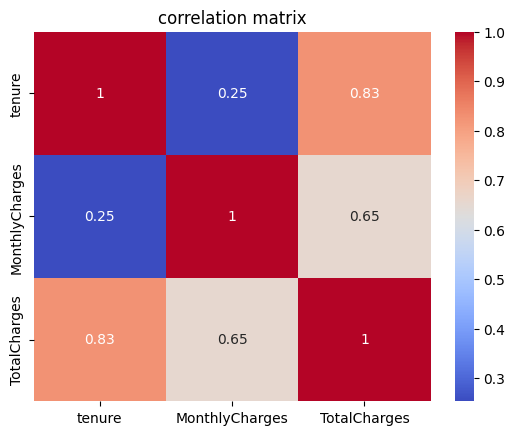

In [11]:
## correlation matrix for numerical features
corr_matrix= customer_df[continuous_feature].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

> We observe that TotalCharges and tenure have strong positive correlation. So we can drop one of the features to reduce redundancy and improve model performance.

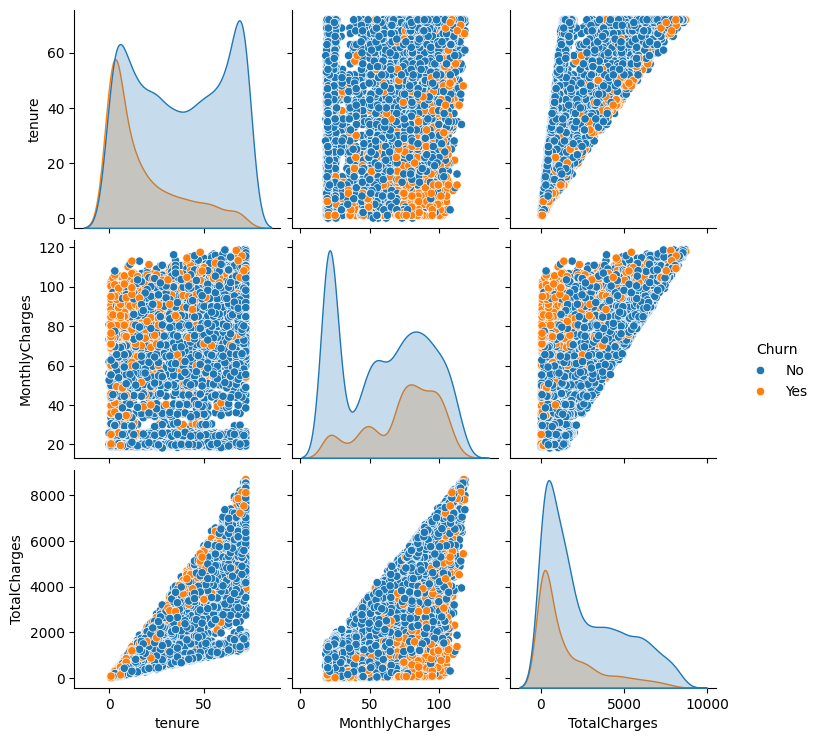

In [12]:
sns.pairplot(customer_df, vars= customer_df[continuous_feature],hue='Churn')
plt.show()

> The above analysis reveals that TotalCharges have positive correlation with tenure and Monthly Charges.Examining the tenure graph suggests that customers are more prone to churn at the commencement of their tenure. Conversely, lower monthly charges appear to correlate with a reduced likelihood of churn, as indicated by the monthly graph.

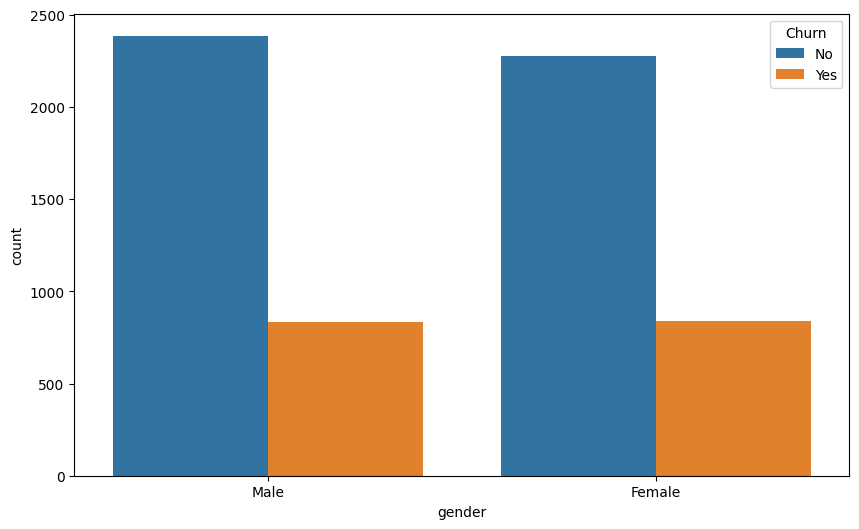

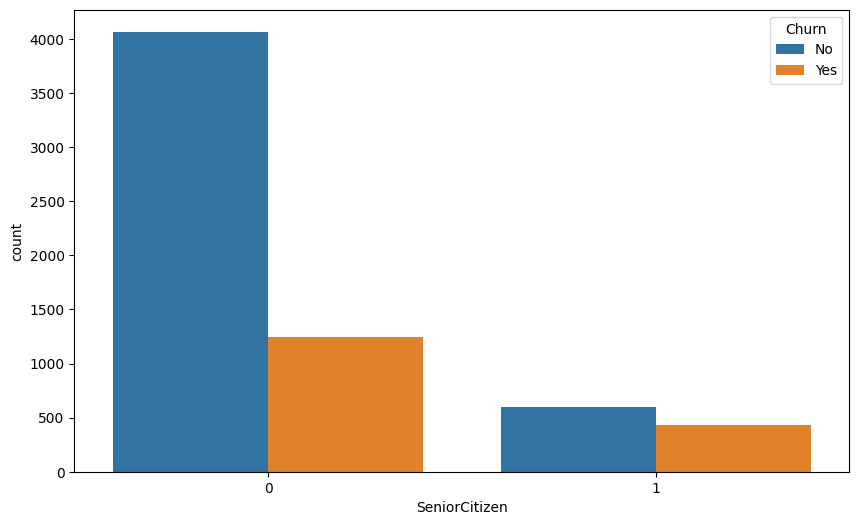

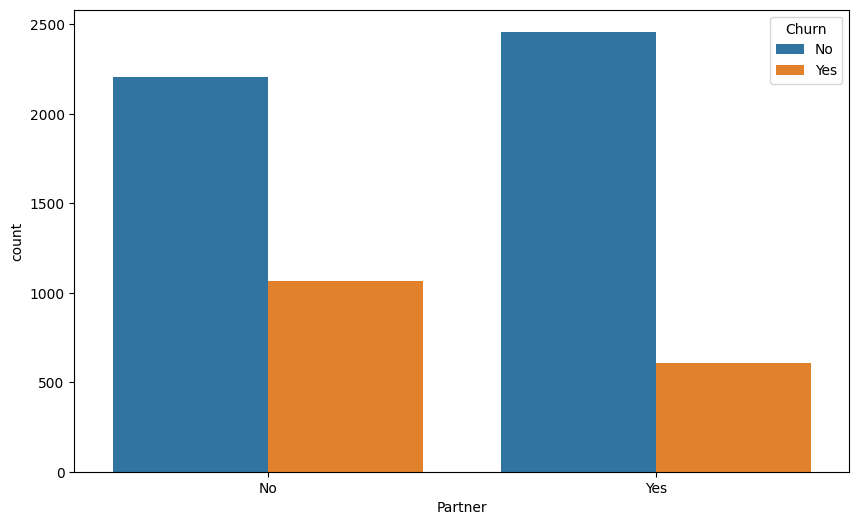

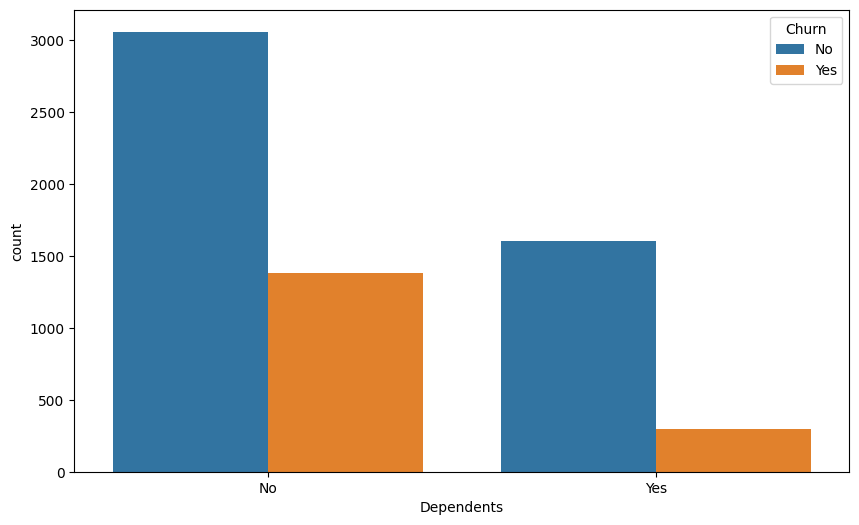

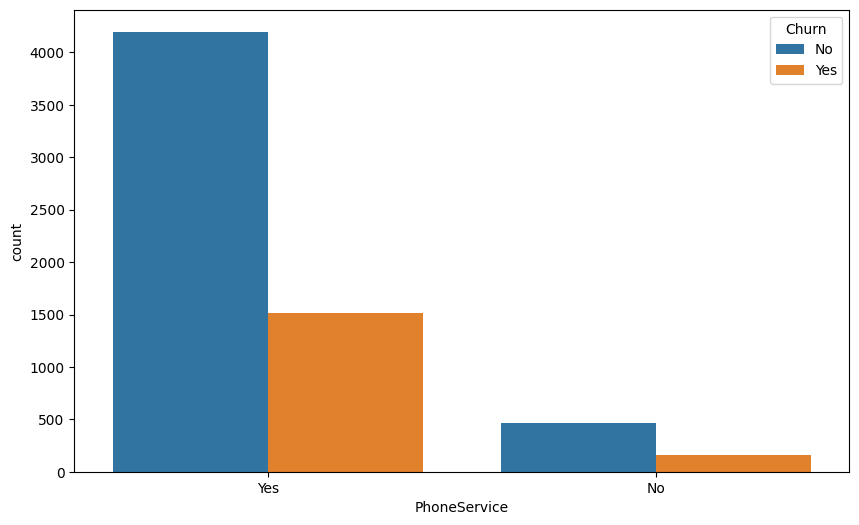

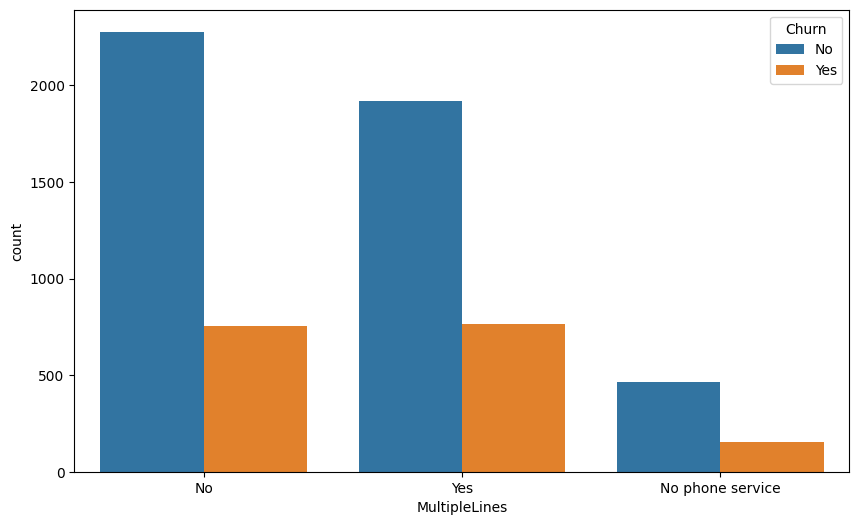

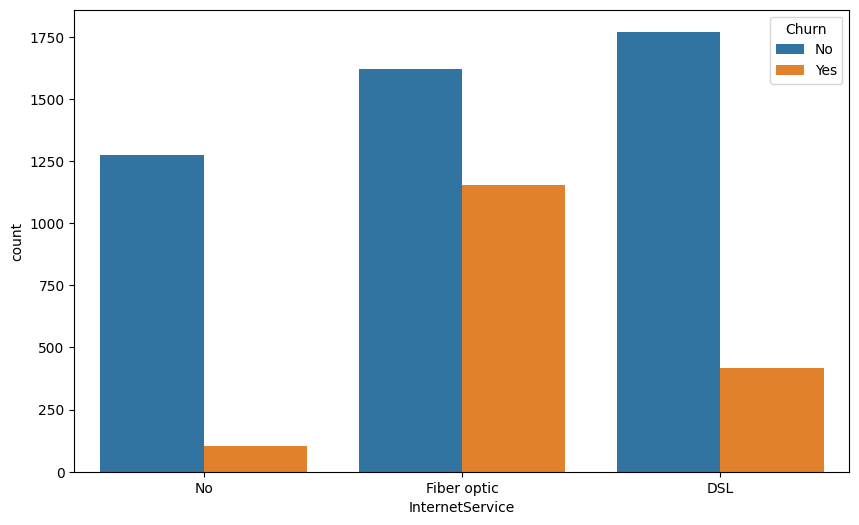

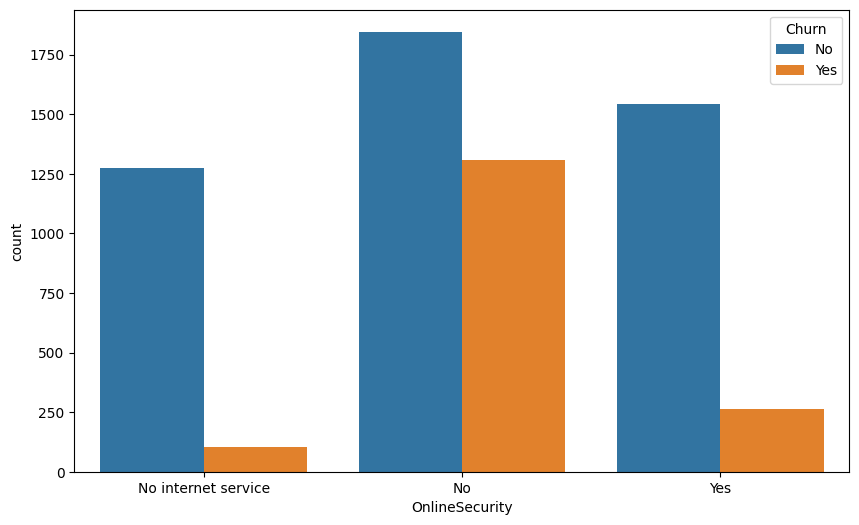

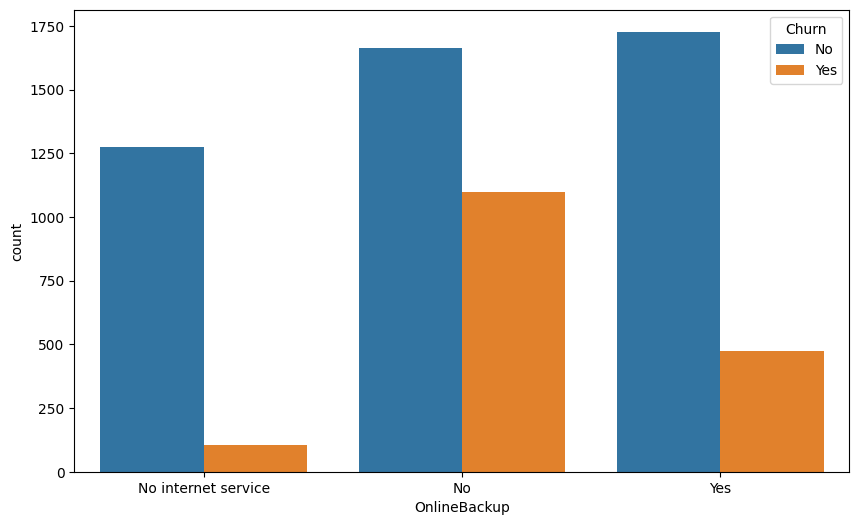

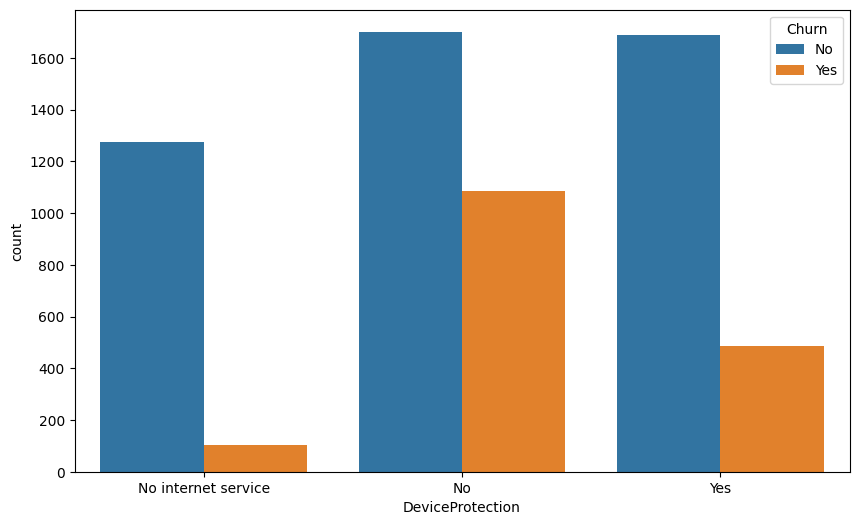

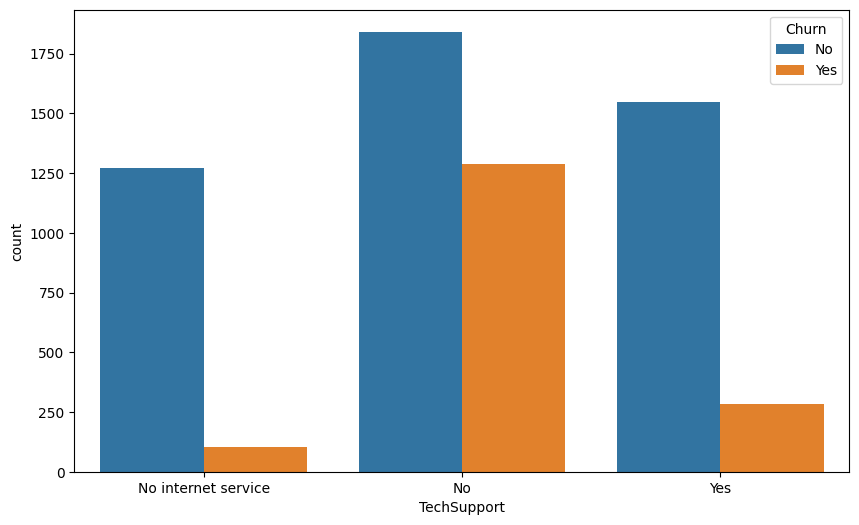

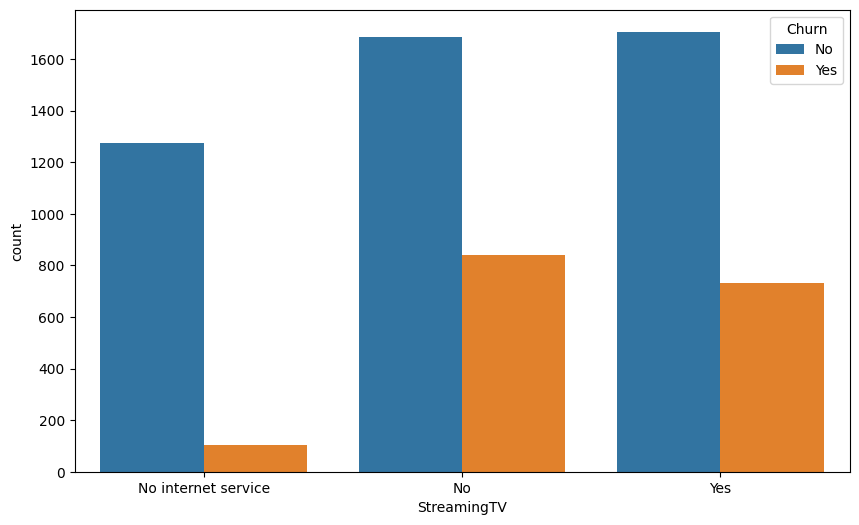

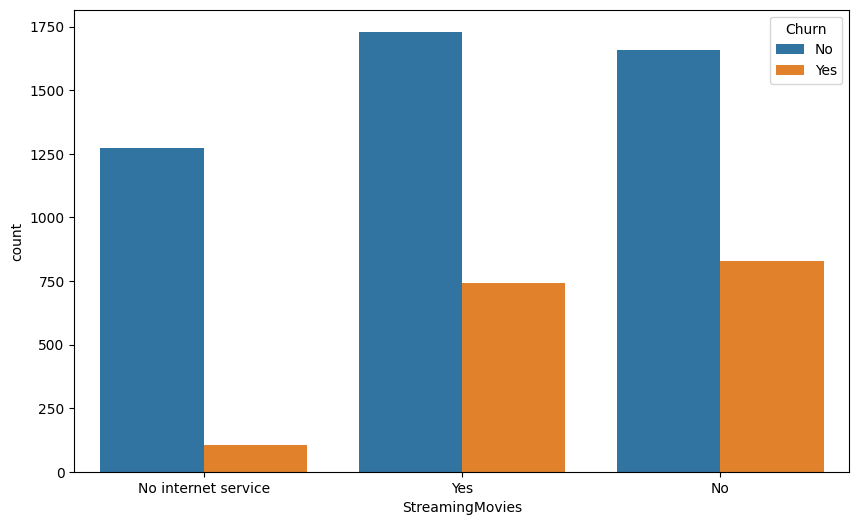

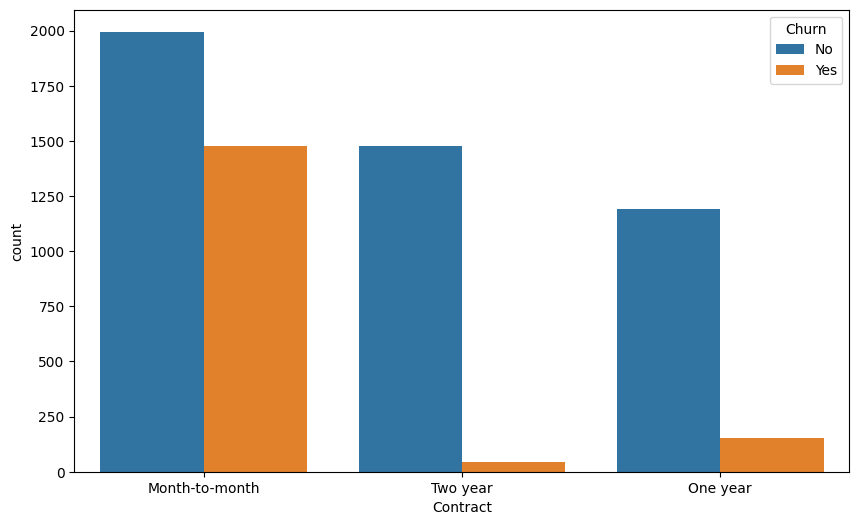

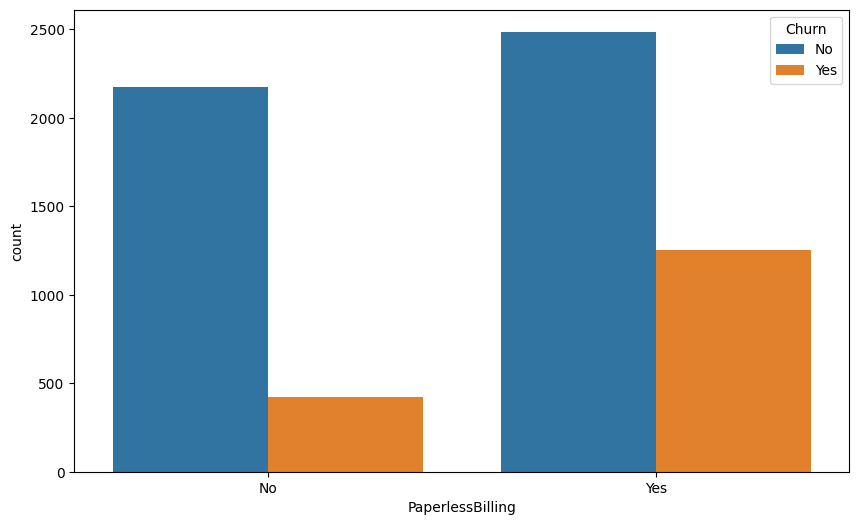

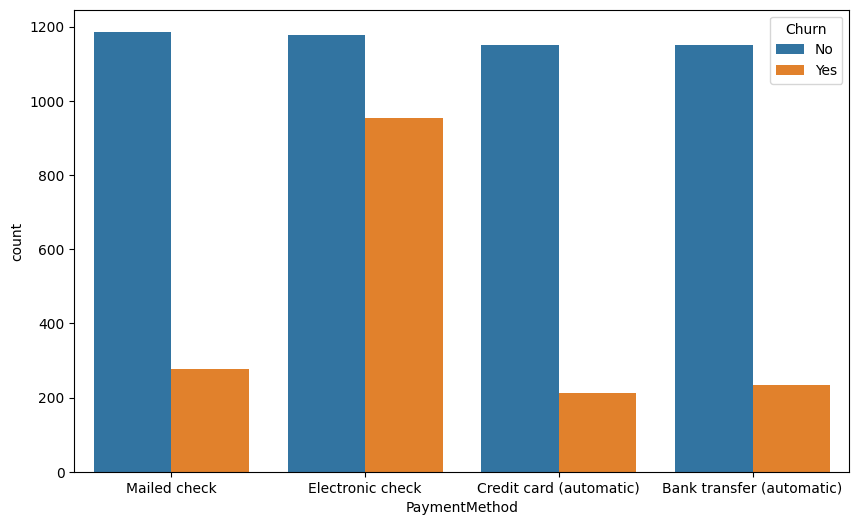

In [13]:
categorical_features.remove('customerID') # We don't need to count the values of customer ID
#visualize distrbution of categorical attributes against churn
for col in categorical_features:
    if col!='Churn':
        plt.figure(figsize=(10,6))
        sns.countplot(data=customer_df, x=col, hue='Churn')
        plt.show()

>We observe that:</br>
>Customers with electronic check payment method tend to churn more compared to other payment methods.</br>
>Customers opting for longer contract terms, such as two-year or one-year contracts, exhibit lower churn rates compared to those with shorter contract terms.</br>
>Younger demographics, such as youngsters, show higher churn rates in the telecom industry compared to senior citizens.</br>

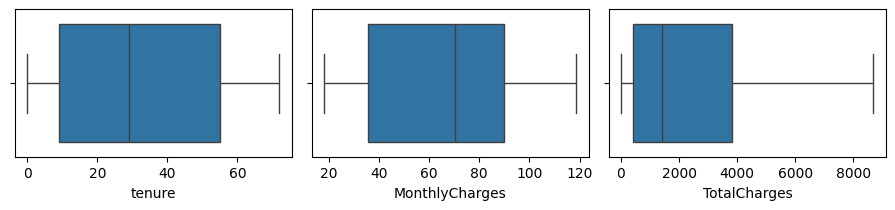

In [14]:
#check for outliers
# Creating  box plots 
plt.figure(figsize=(15,10))
for i, col in enumerate(continuous_feature):
    plt.subplot(5, 5, i+1)
    sns.boxplot(x=customer_df[col])
    plt.xlabel(col)

plt.tight_layout()
plt.show()

> There are no outliers

In [15]:
#Understanding Churn Distribution
customer_df['Churn'].value_counts()

Churn
No     4663
Yes    1675
Name: count, dtype: int64

>The above shows that it is an imbalance datset which requires special treatment(Oversampling Technique which is implemented later)

## Question 2 : Data Pre-processing & Feature Engineering (20 pt)
Discuss the steps you would take to clean and prepare the data for modeling. Justify why each step is necessary.

Perform Feature Engineering on the dataset.

**Hint** : Perform few statistical tests (Eg: ANOVA) on the dataset and Data Scaling, Sampling as needed. Based on that, check which columns can be eliminated.

**Hint** : Check for any null values in the dataset and perform necessary actions. Also, encoding categorical columns necessarily.

#### Null Value Treatment

In [16]:
#Check for null values
customer_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

> There are 11 null values in Total Charges 

In [17]:
#Handling null values
import pandas as pd

mean_total_charges = customer_df['TotalCharges'].mean()   # using mean to preserve Data Distribution

# Replace missing values with the mean
customer_df['TotalCharges'].fillna(mean_total_charges, inplace=True)

# Verify that there are no more missing values in 'TotalCharges' column
print(customer_df['TotalCharges'].isnull().sum())


0


#### Dropping Irrelevant Columns

In [18]:
#dropping customerID column as it is unique and irrelavant in modeling
customer_df.drop(columns='customerID',inplace=True)
#In order to reduce multicollinearity,dropping the Tenure column due to its high correlation (0.8) with Total charges
#customer_df.drop(columns='tenure',inplace=True)

>After dropping the 'tenure' column and running the model, I observed that its absence didn't significantly impact the model performance. Therefore, I decided to use all the features for the final model.

#### Statistical tests

In [19]:
#Perform Anova Test
anova_results={}
for col in continuous_feature:
    groups=customer_df.groupby('Churn')[col].apply(list)
    anova_result=f_oneway(*groups)
    anova_results[col]=anova_result.pvalue

significant_features = [feature for feature, pvalue in anova_results.items() if pvalue < 0.05]
insignificant_features = [feature for feature, pvalue in anova_results.items() if pvalue >= 0.05]
print("Significant Features:", significant_features)
print("Insignificant Features:", insignificant_features)

Significant Features: ['tenure', 'MonthlyCharges', 'TotalCharges']
Insignificant Features: []


> All numerical features are significant.

>>
The above function performs an ANOVA test for each continuous feature in the dataset, comparing the distributions of these features across different levels of the 'Churn' variable. It then identifies significant and insignificant features based on their p-values, considering a significance level of 0.05.

In [20]:
# Chi-square test for categorical features
for col in customer_df.select_dtypes(include=['object']):
    chi2, p, dof, expected = chi2_contingency(pd.crosstab(customer_df['Churn'], customer_df[col]))
    print(f"Chi-square test for {col}: p-value = {p}")

Chi-square test for gender: p-value = 0.36971242927326486
Chi-square test for Partner: p-value = 1.7646587387604017e-30
Chi-square test for Dependents: p-value = 1.2954498345371533e-37
Chi-square test for PhoneService: p-value = 0.4654595163952696
Chi-square test for MultipleLines: p-value = 0.007898315771526552
Chi-square test for InternetService: p-value = 1.4234916067095093e-140
Chi-square test for OnlineSecurity: p-value = 4.119549579373494e-164
Chi-square test for OnlineBackup: p-value = 1.2166070248324645e-116
Chi-square test for DeviceProtection: p-value = 1.4328923647928714e-108
Chi-square test for TechSupport: p-value = 2.607644756577371e-156
Chi-square test for StreamingTV: p-value = 3.619336134410333e-72
Chi-square test for StreamingMovies: p-value = 2.8350820881530613e-72
Chi-square test for Contract: p-value = 1.687883159828126e-229
Chi-square test for PaperlessBilling: p-value = 1.5693910262568274e-52
Chi-square test for PaymentMethod: p-value = 1.073735731546015e-120
Chi

>Lower p-values suggest stronger associations.Certain features like contract type, internet service, and additional service subscriptions strongly influence churn, while others like having a partner or dependents also play significant roles.

#### Encoding

In [21]:
customer_df['gender']=customer_df['gender'].apply(lambda x: 1 if x=='Male' else 0)
customer_df['Churn']=customer_df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)
customer_df['Dependents']=customer_df['Dependents'].apply(lambda x: 1 if x=='Yes' else 0)
customer_df['Partner']=customer_df['Partner'].apply(lambda x: 1 if x=='Yes' else 0)
customer_df['PhoneService']=customer_df['PhoneService'].apply(lambda x: 1 if x=='Yes' else 0)
customer_df['PaperlessBilling']=customer_df['PaperlessBilling'].apply(lambda x: 1 if x=='Yes' else 0)

In [22]:
#one hot encoding for other columns with more than 2 values
columns=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
customer_df_encoded=pd.get_dummies(customer_df, columns=columns, dtype='int')
customer_df_encoded['SeniorCitizen']=customer_df_encoded['SeniorCitizen'].astype('int')
customer_df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,26,1,0,20.90,518.30,0,...,0,1,0,1,0,0,0,0,0,1
1,0,0,0,0,1,1,0,19.90,19.90,0,...,0,1,0,1,0,0,0,0,0,1
2,1,1,1,0,18,1,0,78.55,1422.65,1,...,0,0,1,1,0,0,0,0,1,0
3,0,1,0,0,15,1,1,75.30,1147.45,1,...,1,0,0,1,0,0,0,1,0,0
4,0,0,0,0,2,1,1,20.45,42.45,0,...,0,1,0,1,0,0,0,0,0,1


In [23]:
customer_df_encoded['Churn'].value_counts()

Churn
0    4663
1    1675
Name: count, dtype: int64

#### Define X and y

In [24]:
X=customer_df_encoded.drop(columns=['Churn'])
y=customer_df_encoded['Churn']

#### split the dataset

In [25]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#### Apply RandomOverSampler for imbalance dataset

In [26]:

# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [27]:
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
random_oversampler = RandomOverSampler(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = random_oversampler.fit_resample(X_train, y_train)


#### Standarization

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train_resampled)

X_train_resampled=scaler.transform(X_train_resampled)

# transform testing dataset
X_test = scaler.transform(X_test)

In [29]:
print (X_train_resampled.shape)
print(y_train_resampled.shape)
print(X_test.shape)
print(y_test.shape)

(7458, 40)
(7458,)
(1268, 40)
(1268,)


## Question 3 : Modeling (20 pt)

Train at least three different classifier models (e.g., XGBoost, Random Forest, Decision Tree Classifier etc.) and optimize hyperparameters(Hint : GridsearchCV) to enhance performance.

Implement a validation pipeline utilizing 5-fold cross-validation. For each classifier, report F1 score, Cross-validation score, Precision, Recall, Accuracy). Also, for each model, plot the ROC-AUC curve.

Then, combine your classifiers into an ensemble that outperforms each individual classifier. Describe and discuss your findings.


#### XGBoostClassifier

In [30]:
# Applying grid search to get the best parameters

xgb_classifier = xgb.XGBClassifier()

# Define hyperparameters grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01,0.001],
    'max_depth': [3, 4],
    'n_estimators': [30,50]
}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and hyperparameter optimization for XGBoost classifier
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid_xgb, cv=cv, scoring='f1')
grid_search_xgb.fit(X_train_resampled, y_train_resampled)

# Get best XGBoost model
best_xgb_model = grid_search_xgb.best_estimator_

print("Best parameters:", grid_search_xgb.best_params_)
print("Best estimator:", best_xgb_model)



Best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50}
Best estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [31]:
#Now use the above best paramters in the below model

best_xgb_model.fit(X_train_resampled, y_train_resampled)

# Validation Pipeline with Cross-Validation
cv_results_xgb = cross_val_score(best_xgb_model, X_train_resampled, y_train_resampled, cv=cv, scoring='balanced_accuracy')
print("Cross-validation Balanced Accuracy Score:", cv_results_xgb.mean())

# Calculate test balanced accuracy on test data 
y_pred = best_xgb_model.predict(X_test)
test_balanced_accuracy_xgb = balanced_accuracy_score(y_test, y_pred)
print("Test Balanced Accuracy:", test_balanced_accuracy_xgb)

# Calculate training balanced accuracy to check for overfitting
train_balanced_accuracy_xgb = balanced_accuracy_score(y_train_resampled, best_xgb_model.predict(X_train_resampled))
print("Training Balanced Accuracy:", train_balanced_accuracy_xgb)

# Print classification report
print("Classification report:")
print(classification_report(y_test, y_pred))

# Plot ROC curve
y_proba_xgb = best_xgb_model.predict_proba(X_test)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)



Cross-validation Balanced Accuracy Score: 0.756775464670637
Test Balanced Accuracy: 0.7703490235802485
Training Balanced Accuracy: 0.7719227674979887
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       934
           1       0.51      0.82      0.63       334

    accuracy                           0.75      1268
   macro avg       0.71      0.77      0.72      1268
weighted avg       0.81      0.75      0.76      1268



#### GradientBoostingClassifier

In [32]:
# Instantiate GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()

# Define hyperparameters grid for GradientBoostingClassifier
param_grid_gb = {
    'learning_rate': [0.001, 0.01],
    'max_depth': [3, 4],
    'n_estimators': [100, 200]
}

# Perform cross-validation and hyperparameter optimization for GradientBoostingClassifier
grid_search_gb = GridSearchCV(gb_classifier, param_grid_gb, cv=cv, scoring='f1')
grid_search_gb.fit(X_train_resampled, y_train_resampled)

# Get best GradientBoostingClassifier model
best_gb_model = grid_search_gb.best_estimator_
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best estimator:", best_gb_model)


Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}
Best estimator: GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=200)


In [34]:

# Train Gradient Boosting classifier on the entire training set
best_gb_model.fit(X_train_resampled, y_train_resampled)

# Validation Pipeline with Cross-Validation
cv_results_gb = cross_val_score(best_gb_model, X_train_resampled, y_train_resampled, cv=cv, scoring='balanced_accuracy')
print("Cross-validation balanced accuracy Score:", cv_results_gb.mean())

# Predict on test data
y_pred_gb = best_gb_model.predict(X_test)
print('Test balanced accuracy:', balanced_accuracy_score(y_test, y_pred_gb))


# Calculate training accuracy to check for overfitting
train_accuracy_gb = balanced_accuracy_score(y_train_resampled, best_gb_model.predict(X_train_resampled))
print("Training Balanced Accuracy:", train_accuracy_gb)

# Print classification report
print("Classification report:", classification_report(y_test, y_pred_gb))


# ROC-AUC curve
y_proba_gb = best_gb_model.predict_proba(X_test)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb[:, 1])
roc_auc_gb = auc(fpr_gb, tpr_gb)



Cross-validation balanced accuracy Score: 0.7725933389711572
Test balanced accuracy: 0.7781706394491531
Training Balanced Accuracy: 0.7853311879860552
Classification report:               precision    recall  f1-score   support

           0       0.92      0.74      0.82       934
           1       0.53      0.81      0.64       334

    accuracy                           0.76      1268
   macro avg       0.72      0.78      0.73      1268
weighted avg       0.82      0.76      0.77      1268



#### Random Forest Classifier

In [35]:

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define hyperparameters grid for Random Forest
param_grid_rf = {
    'min_samples_split': [2, 5, 10],
    'n_estimators': [ 200, 300],
    'max_depth': [ 2, 5]
}

# Perform cross-validation and hyperparameter optimization for Random Forest classifier
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=cv, scoring='f1')
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Get best Random Forest model
best_rf_model = grid_search_rf.best_estimator_
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best estimator:", best_rf_model)

Best parameters for Random Forest: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 300}
Best estimator: RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=300)


In [36]:

#best_rf_model=RandomForestClassifier(max_depth=5, min_samples_split=10,n_estimators=300)
best_rf_model.fit(X_train_resampled, y_train_resampled)

# Validation Pipeline with Cross-Validation
cv_results_rf = cross_val_score(best_rf_model, X_train_resampled, y_train_resampled, cv=cv, scoring='balanced_accuracy')
print(" Cross-validation balanced accuracy Score:" ,cv_results_rf.mean())

# Predict on test data
y_pred=best_rf_model.predict(X_test)
print('test balanced accuracy',balanced_accuracy_score(y_test,y_pred))

# Calculate training accuracy to check for overfitting
train_accuracy_rf = balanced_accuracy_score(y_train_resampled, best_rf_model.predict(X_train_resampled))
print("Training Accuracy:", train_accuracy_rf)

print("Classification report:", classification_report(y_test,y_pred ))

#  ROC-AUC curve
y_proba_xgb = best_rf_model.predict_proba(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_xgb[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_results = {'Random forest': (fpr_rf, tpr_rf, roc_auc_rf)}




 Cross-validation balanced accuracy Score: 0.7652174460658185
test balanced accuracy 0.774195719909218
Training Accuracy: 0.7732636095467954
Classification report:               precision    recall  f1-score   support

           0       0.92      0.71      0.80       934
           1       0.51      0.84      0.63       334

    accuracy                           0.75      1268
   macro avg       0.72      0.77      0.72      1268
weighted avg       0.81      0.75      0.76      1268



#### DT

In [37]:

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define hyperparameters grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],  # None means unlimited depth
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Perform cross-validation and hyperparameter optimization for Decision Tree classifier
grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=cv, scoring='f1')
grid_search_dt.fit(X_train_resampled, y_train_resampled)

# Get best Decision Tree model
best_dt_model = grid_search_dt.best_estimator_
print("Best parameters for Decision Tree: ", best_dt_model)


Best parameters for Decision Tree:  DecisionTreeClassifier(criterion='entropy')


In [38]:

# Train the Decision Tree model
best_dt_model.fit(X_train_resampled, y_train_resampled)

# Validation Pipeline with Cross-Validation
cv_results_dt = cross_val_score(best_dt_model, X_train_resampled, y_train_resampled, cv=cv, scoring='balanced_accuracy')
print("Cross-validation balanced accuracy Score:", cv_results_dt.mean())

# Predict on test data
y_pred_dt = best_dt_model.predict(X_test)
print('Test balanced accuracy:', balanced_accuracy_score(y_test, y_pred_dt))

# Calculate training accuracy to check for overfitting
train_accuracy_dt = balanced_accuracy_score(y_train_resampled, best_dt_model.predict(X_train_resampled))
print("Training Accuracy:", train_accuracy_dt)
print("Classification report:", classification_report(y_test, y_pred_dt))


# ROC-AUC curve
y_proba_dt = best_dt_model.predict_proba(X_test)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_results['Decision Tree'] = (fpr_dt, tpr_dt, roc_auc_dt)


Cross-validation balanced accuracy Score: 0.8724864602263527
Test balanced accuracy: 0.660272602546513
Training Accuracy: 0.9990614105658353
Classification report:               precision    recall  f1-score   support

           0       0.82      0.81      0.82       934
           1       0.49      0.51      0.50       334

    accuracy                           0.73      1268
   macro avg       0.66      0.66      0.66      1268
weighted avg       0.73      0.73      0.73      1268



#### ROC AUC Curve

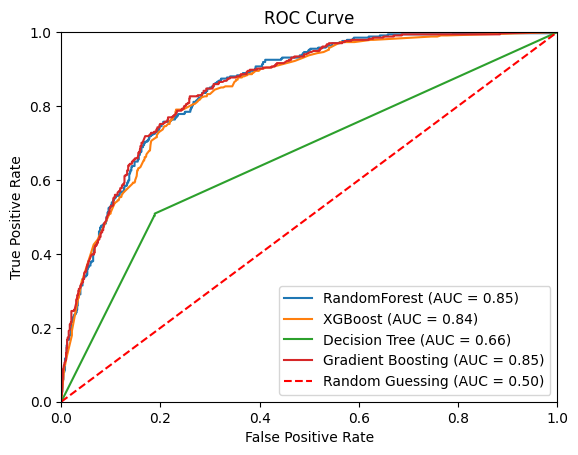

In [39]:

# Plot ROC-AUC curve for RandomForest
plt.plot(fpr_rf, tpr_rf, label='RandomForest (AUC = %0.2f)' % roc_auc_rf)

# Plot ROC-AUC curve for XGBoost
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)

# Plot ROC-AUC curve for Decision Tree
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)

# Plot ROC-AUC curve for gradient Boosting
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting (AUC = %0.2f)' % roc_auc_gb)

# Plot ROC curve for random guessing (50%)
plt.plot([0, 1], [0, 1],'r--', label='Random Guessing (AUC = 0.50)')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


> RandomForest, XGBoost, and Gradient Boosting models exhibit good performance, as seen by their ROC-AUC curves being closer to the top-left corner of the plot. Higher curves indicate better classification performance.

>However, the Decision Tree model's ROC-AUC curve appears to be lower and closer to the diagonal line , suggesting low performance compared to the other models.

#### Voting Classifier

In [40]:
# Define classifiers
rf_classifier = best_rf_model
xgb_classifier = best_xgb_model
gb_classifier=best_gb_model
#dt_classifier = best_dt_model #removng decison tree as it decreases the overall accuracy


voting_classifier = VotingClassifier(  # Define the voting classifier
    estimators=[
        ('random_forest', rf_classifier),
        ('xgboost', xgb_classifier),
        ('gb', gb_classifier)
    ],
    voting='soft' 
)

# Train the voting classifier
voting_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_voting = voting_classifier.predict(X_test)

# Calculate test balanced accuracy
accuracy_voting = balanced_accuracy_score(y_test, y_pred_voting)
print("Voting Classifier Test Balanced Accuracy:", accuracy_voting)

# Calculate train balanaced accuracy
train_pred_voting = voting_classifier.predict(X_train_resampled)
train_accuracy_voting = balanced_accuracy_score(y_train_resampled, train_pred_voting)
print("Voting Classifier Training Balanced Accuracy:", train_accuracy_voting)


Voting Classifier Test Balanced Accuracy: 0.7752760004616035
Voting Classifier Training Balanced Accuracy: 0.7764816304639313


## Question 4 : Evaluation and Reporting(20 pt)

Select a model that is expected to perform optimally on the unseen data and provide the predictions accordingly. Give clear conclusions


After evaluating multiple classification models, including XGBoost, Gradient Boosting, Random Forest, Decision Tree, and a Voting Classifier, the following conclusions can be drawn based on their test and training scores:

Gradient Boosting:
Test balanced accuracy: 0.778
Training Balanced Accuracy: 0.785
The Gradient Boosting model demonstrates the highest performance among the individual models, with a test balanced accuracy score of approximately 0.778 and a training balanced accuracy score of approximately 0.785.

Voting Classifier:
Test Balanced Accuracy: 0.775
Training Balanced Accuracy: 0.777
The Voting Classifier also performs well, with a test balanced accuracy score of approximately 0.775 and a training balanced accuracy score of approximately 0.777. However, it slightly underperforms compared to Gradient Boosting.

XGBoost:
Test Balanced Accuracy: 0.770
Training Balanced Accuracy: 0.772
XGBoost exhibits decent performance, with a test balanced accuracy score of approximately 0.770 and a training balanced accuracy score of approximately 0.772.

Random Forest:
Test Balanced Accuracy: 0.774
Training Balanced Accuracy: 0.772
Random Forest performs reasonably well, with a test balanced accuracy score of approximately 0.774 and a training balanced accuracy score of approximately 0.772.

Decision Tree:
Test balanced accuracy: 0.6546019310415572
Training Accuracy: 0.9990614105658353
The Decision Tree model demonstrates bad performance among the evaluated models, with a test balanced accuracy score of approximately 0.65 and a training balanced accuracy score of approximately 0.99 which is overfitted.

In summary, while all models perform reasonably well, Gradient Boosting stands out as the optimal model for making predictions on unseen data, followed closely by the Voting Classifier. The Decision Tree model exhibits the weakest performance among the evaluated models.

In [41]:
# Applying Gradient Boosting model

y_pred_GB = best_gb_model.predict(X_test)
print("Test Accuracy:", balanced_accuracy_score(y_test, y_pred_GB))
print("classification Report: ", classification_report(y_test, y_pred_GB))

Test Accuracy: 0.7781706394491531
classification Report:                precision    recall  f1-score   support

           0       0.92      0.74      0.82       934
           1       0.53      0.81      0.64       334

    accuracy                           0.76      1268
   macro avg       0.72      0.78      0.73      1268
weighted avg       0.82      0.76      0.77      1268



## Question 5 : External validation (30 pt)

A dataset named ‘test.csv’ is provided to you in which the label is hidden. You have to choose the best model(the model which has the highest score) and then use that model to predict the label on the ‘test.csv’.

After prediction, you will get an array of 0’s and 1’s. Convert that array to csv file, name it as ‘submission.csv’ and submit that ‘submission.csv’ file.

In [42]:
# Load the  data
test_df= pd.read_csv("C:\\Users\\kumarip\\Documents\\Priya\\midterm\\Problem1\\dataset\\test.csv")
test_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80
1,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45
2,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.70
3,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35
4,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.10


In [43]:
test_df.shape

(705, 20)

In [44]:
#Preprocess the data.

#converting TotalCharges to numeric type
test_df['TotalCharges'] = pd.to_numeric(test_df['TotalCharges'], errors='coerce')  
#converting SeniorCitizen to Categorical type as it has values 0 and 1
test_df['SeniorCitizen']=test_df['SeniorCitizen'].astype('category')

#handling missing values if present
mean_total_charges = test_df['TotalCharges'].mean()
test_df['TotalCharges'].fillna(mean_total_charges, inplace=True)
#drop columns
test_df.drop(columns='customerID',inplace=True)

#Encoding
test_df['gender']=test_df['gender'].apply(lambda x: 1 if x=='Male' else 0)
test_df['Dependents']=test_df['Dependents'].apply(lambda x: 1 if x=='Yes' else 0)
test_df['Partner']=test_df['Partner'].apply(lambda x: 1 if x=='Yes' else 0)
test_df['PhoneService']=test_df['PhoneService'].apply(lambda x: 1 if x=='Yes' else 0)
test_df['PaperlessBilling']=test_df['PaperlessBilling'].apply(lambda x: 1 if x=='Yes' else 0)

#one hot encoding for other columns with more than 2 values
columns=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
test_df_encoded=pd.get_dummies(test_df, columns=columns, dtype='int')
test_df_encoded['SeniorCitizen']=test_df_encoded['SeniorCitizen'].astype('int')

#scaling
test_df_encoded = scaler.transform(test_df_encoded)


In [45]:
#Prediction
y_pred_gb = best_gb_model.predict(test_df_encoded)


In [47]:
#Mapping
churn_mapping = {
    1: "Yes",
    0: "No",
}

# Map predicted values to 'yes' or 'No'
churn_value = [churn_mapping[value] for value in y_pred_gb]

In [48]:
# step 5. Save output as csv file
pred = pd.DataFrame(churn_value)
pred.to_csv('./submission.csv', index = False)